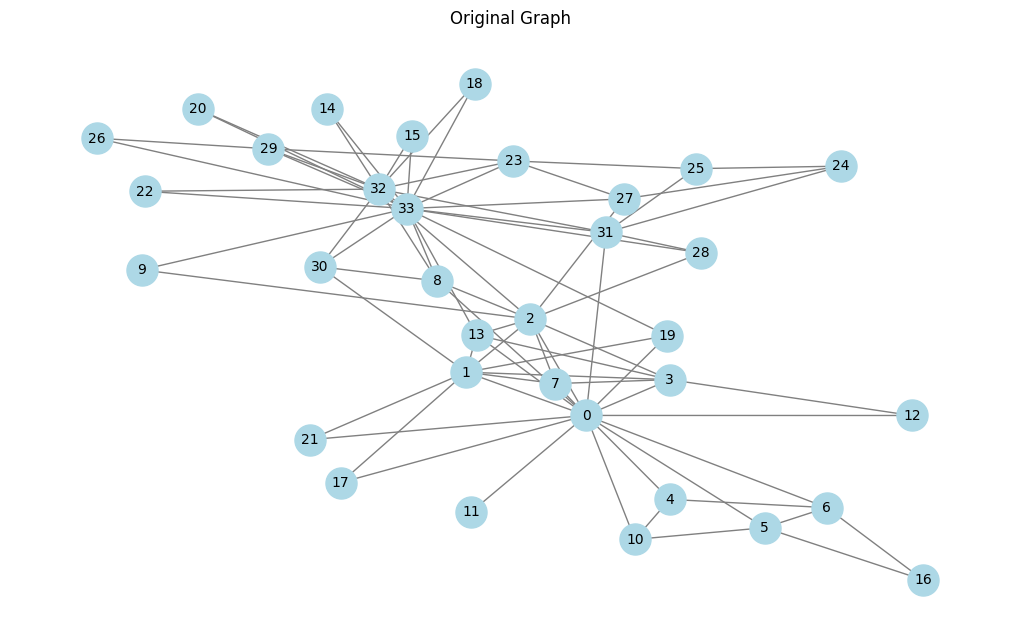

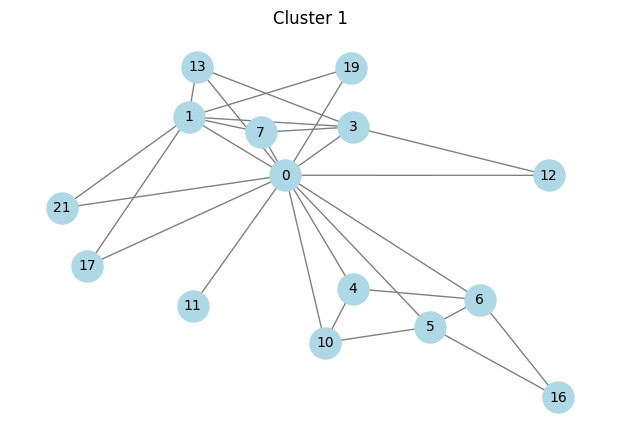

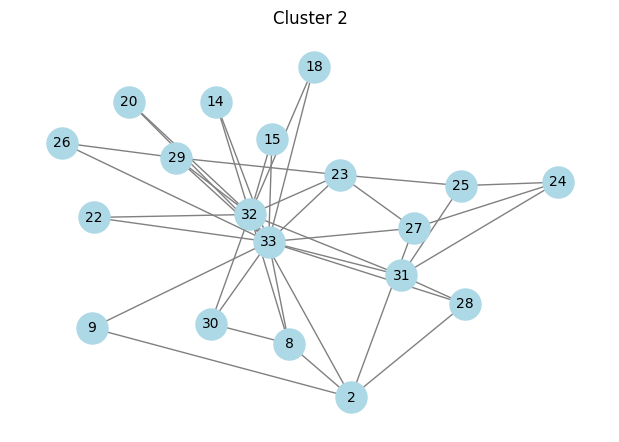

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def girvan_newman(graph):

    def edge_to_remove(graph):

        edge_betweenness = nx.edge_betweenness_centrality(graph)
        return max(edge_betweenness, key=edge_betweenness.get)


    local_graph = graph.copy()
    components = [list(local_graph.nodes)]
    clusters = []

    while len(components) == 1:
        edge = edge_to_remove(local_graph)
        local_graph.remove_edge(*edge)
        components = list(nx.connected_components(local_graph))
        clusters.append(components)

    return clusters


G = nx.karate_club_graph()
clusters = girvan_newman(G)


plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Original Graph")
plt.show()


for i, cluster in enumerate(clusters[-1], start=1):
    subgraph = G.subgraph(cluster)
    plt.figure(figsize=(6, 4))
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(f"Cluster {i}")
    plt.show()


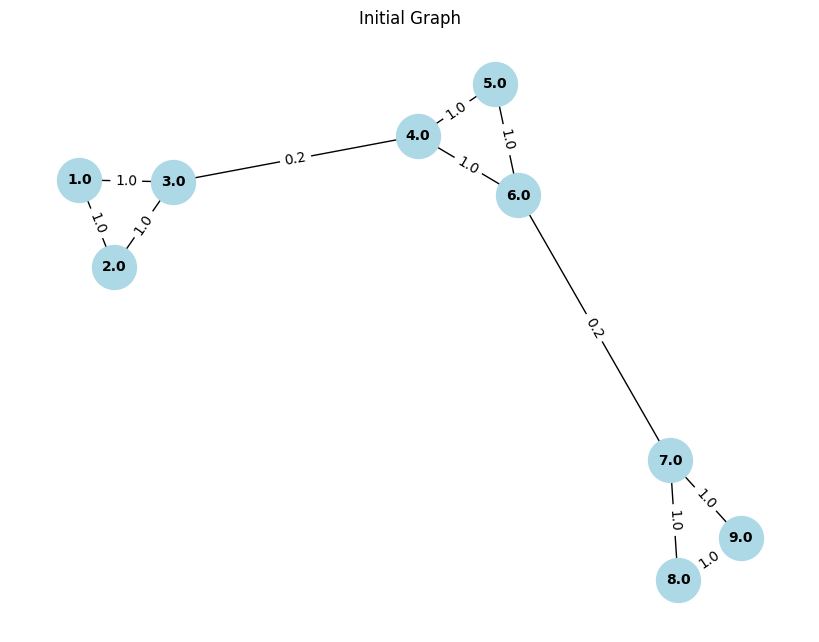

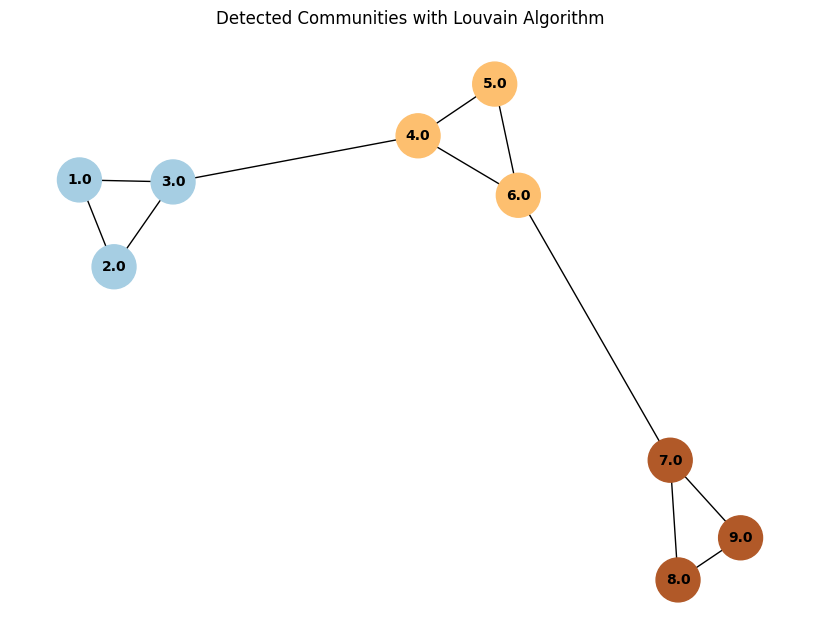

   Node  Community
0   1.0          0
1   2.0          0
2   3.0          0
3   4.0          1
4   5.0          1
5   6.0          1
6   7.0          2
7   8.0          2
8   9.0          2


In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import pandas as pd


edges = [
    (1, 2, 1), (1, 3, 1), (2, 3, 1),
    (4, 5, 1), (4, 6, 1), (5, 6, 1),
    (7, 8, 1), (7, 9, 1), (8, 9, 1),
    (3, 4, 0.2), (6, 7, 0.2)
]


df_edges = pd.DataFrame(edges, columns=["Node1", "Node2", "Weight"])


G = nx.Graph()
for _, row in df_edges.iterrows():
    G.add_edge(row['Node1'], row['Node2'], weight=row['Weight'])


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)})
plt.title("Initial Graph")
plt.show()


partition = community_louvain.best_partition(G, weight='weight')


colors = [partition[node] for node in G.nodes()]


plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.Paired, node_size=1000, font_size=10, font_weight='bold')
plt.title("Detected Communities with Louvain Algorithm")
plt.show()


community_data = pd.DataFrame({'Node': list(partition.keys()), 'Community': list(partition.values())})

print(community_data)


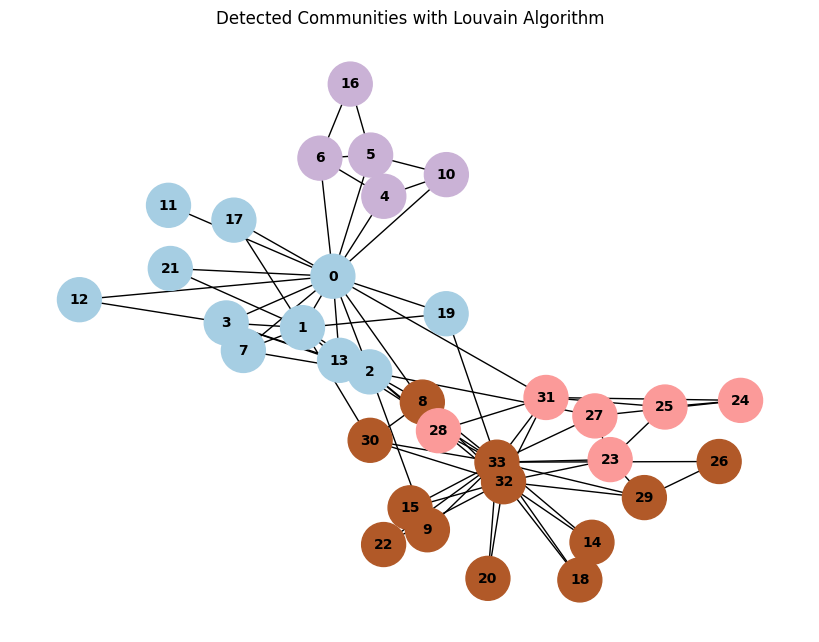

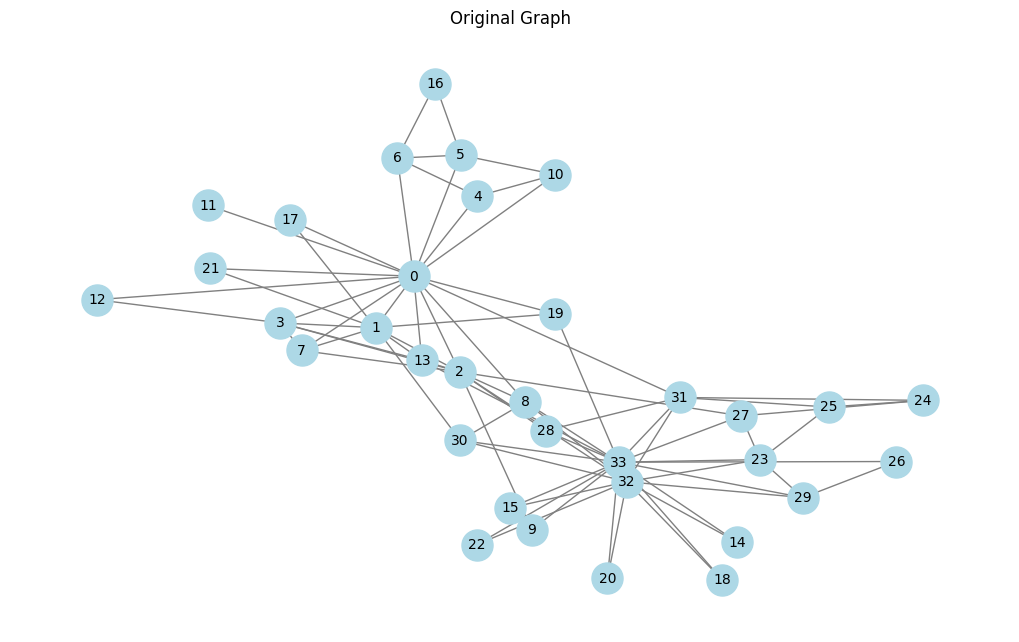

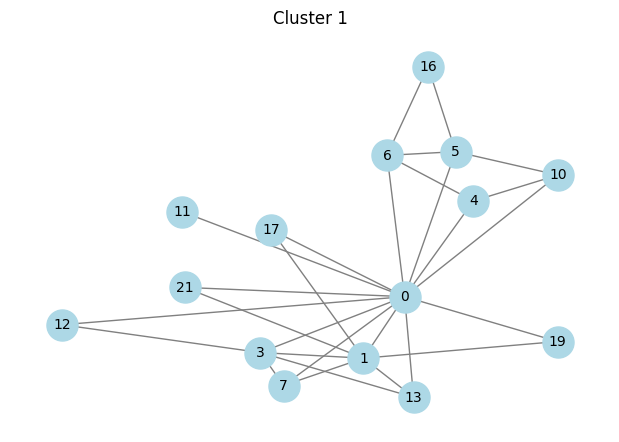

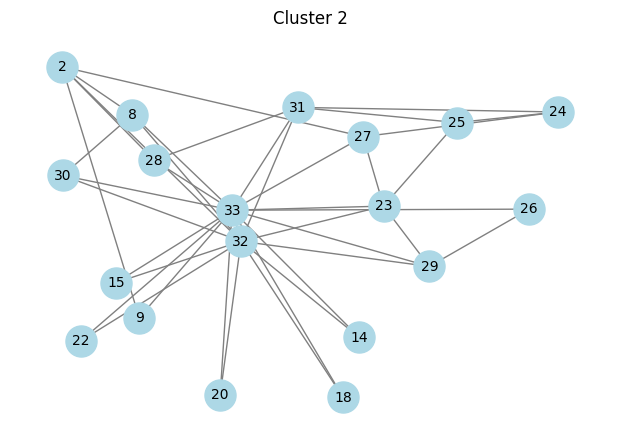

       Algorithm  Time (seconds)
0        Louvain        0.249540
1  Girvan-Newman        0.764373


In [ ]:
import time
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import pandas as pd


G = nx.karate_club_graph()


start_time_louvain = time.time()


partition_louvain = community_louvain.best_partition(G, weight='weight')


colors_louvain = [partition_louvain[node] for node in G.nodes()]


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=colors_louvain, cmap=plt.cm.Paired, node_size=1000, font_size=10, font_weight='bold')
plt.title("Detected Communities with Louvain Algorithm")
plt.show()

end_time_louvain = time.time()
time_louvain = end_time_louvain - start_time_louvain


start_time_girvan = time.time()

def girvan_newman(graph):
    def edge_to_remove(graph):
        edge_betweenness = nx.edge_betweenness_centrality(graph)
        return max(edge_betweenness, key=edge_betweenness.get)

    local_graph = graph.copy()
    components = [list(local_graph.nodes)]
    clusters = []

    while len(components) == 1:
        edge = edge_to_remove(local_graph)
        local_graph.remove_edge(*edge)
        components = list(nx.connected_components(local_graph))
        clusters.append(components)

    return clusters


clusters_girvan = girvan_newman(G)


plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Original Graph")
plt.show()

for i, cluster in enumerate(clusters_girvan[-1], start=1):
    subgraph = G.subgraph(cluster)
    plt.figure(figsize=(6, 4))
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(f"Cluster {i}")
    plt.show()

end_time_girvan = time.time()
time_girvan = end_time_girvan - start_time_girvan


comparison_results = pd.DataFrame({
    "Algorithm": ["Louvain", "Girvan-Newman"],
    "Time (seconds)": [time_louvain, time_girvan]
})


print(comparison_results)
